In [ ]:
#Import correct packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#models the linear relationship between a dependent variable y and the independent variables x.

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3 # linear regression
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [ ]:
#Random cubic function 
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3 # cubic regression & function
y_noise = 20 * np.random.normal(size=x.size)

ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [ ]:
#Quadratic function
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = np.power(x,2)

y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [ ]:
#exponnetial function
X = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [ ]:
#logarithmic function
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [ ]:
#Sigmoidal regression
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [17]:
import numpy as np
import pandas as pd

#downloading dataset
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv -o china_gdp.csv
    
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1218  100  1218    0     0   2242      0 --:--:-- --:--:-- --:--:--  2251


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


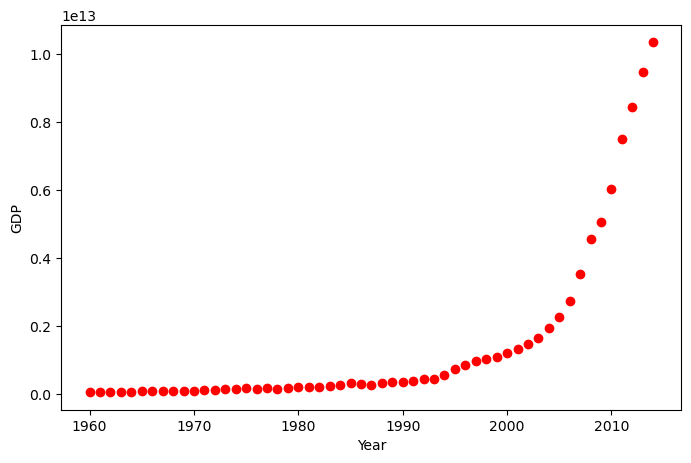

In [18]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

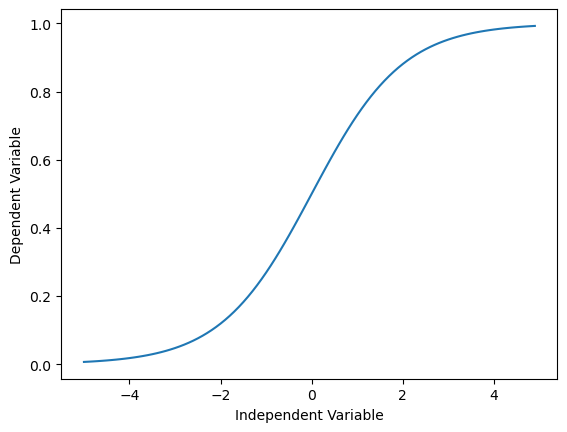

In [19]:
#From an initial look at the plot, we determine that the logistic function could be a good approximation,
#since it has the property of starting with a slow growth, 
#increasing growth in the middle, and then decreasing again at the end; as illustrated below

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [20]:
#Build a model
#Let's build our regression model and initialize its parameters

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

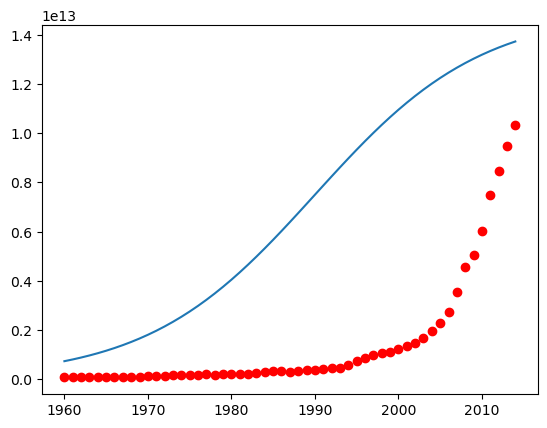

In [21]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')


In [22]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#Use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. 
#Optimize values for the parameters so that the sum of the 
# squared residuals of sigmoid(xdata, *popt) - ydata is minimized.


In [23]:
#Find best parameters for curve fit

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451714, beta_2 = 0.997207


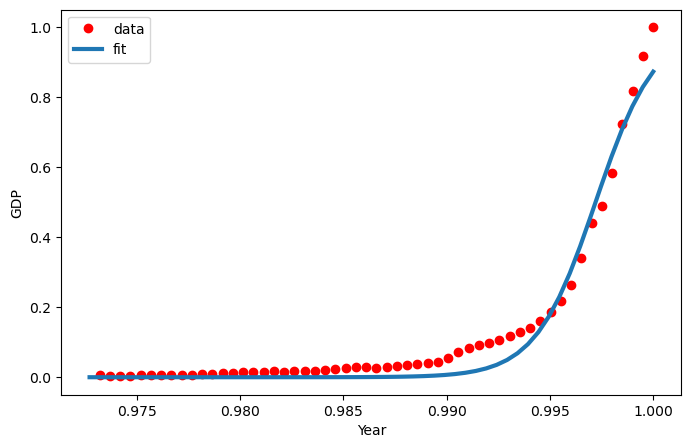

In [24]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

[82.92919065  1.39735195]
Mean absolute error: 0.22
Residual sum of squares (MSE): 0.13
R2-score: -0.55


/Users/martaporniecekumar/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


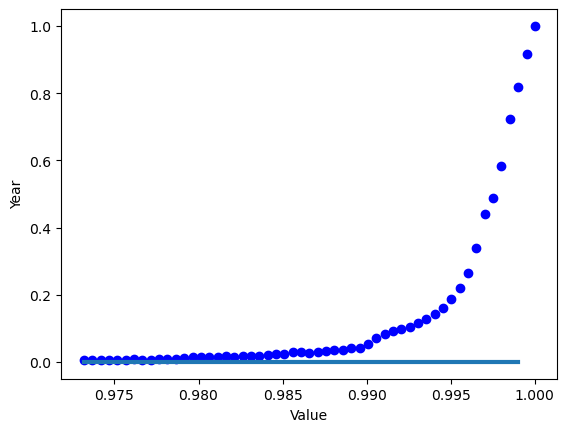

In [28]:
#EXERSISE
#Calculate accuracy of the model

# write your code here
#Generate a mask
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pylab as pl

msk = np.random.rand(len(df))<0.8
#define the train pop
train_x = xdata[msk]
train_y= ydata[msk]
test_x = xdata[~msk]
test_y= ydata[~msk]


# build the model using train set
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid, train_x, train_y)
print(popt)

# predict using test set 
y_hat = sigmoid(test_x, *popt)


# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

plt.scatter(xdata, ydata,  color='blue')
plt.plot(test_x, y_hat, linewidth=3.0, label='fit')
plt.xlabel("Value")
plt.ylabel("Year")
plt.show()
